In [163]:
import numpy as np 
import pandas as pd 
import statsmodels
from statsmodels.tsa.stattools import coint
import statsmodels.api as stat
import statsmodels.tsa.stattools as tsa
import matplotlib.pyplot as plt
import pandas_datareader.data as data
import datetime
from datetime import date
from mpl_finance import candlestick_ohlc
import mplfinance as mpf
import matplotlib.dates as mdates

In [164]:
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2020, 12, 31)

btc_df = data.DataReader("BTC-USD", "yahoo", start, end)
btc_df["btc_Adj_Close"] = btc_df["Adj Close"]
btc_df.drop(["Volume", "Adj Close"], axis=1, inplace=True)
btc_df.dropna()

eth_df = data.DataReader("ETH-USD", "yahoo", start, end)
eth_df["eth_Adj_Close"] = eth_df["Adj Close"]
eth_df.drop(["Volume", "Adj Close"], axis=1, inplace=True)
eth_df.dropna()
print("Data Download completed")

Data Download completed


In [165]:
eth_df

,High,Low,Open,Close,eth_Adj_Close
Date,,,,,
2015-12-31,0.975414,0.910277,0.912098,0.933542,0.933542
2016-01-01,0.954822,0.931442,0.933712,0.948024,0.948024
2016-01-02,0.969637,0.936560,0.947401,0.937124,0.937124
2016-01-03,0.991362,0.934313,0.938430,0.971905,0.971905
2016-01-04,0.976438,0.929835,0.972045,0.954480,0.954480
...,...,...,...,...,...
2020-12-27,711.393555,628.334961,635.887146,682.642334,682.642334
2020-12-28,745.877747,683.205811,683.205811,730.397339,730.397339
2020-12-29,737.952881,692.149414,730.358704,731.520142,731.520142


In [166]:
btc_df

,High,Low,Open,Close,btc_Adj_Close
Date,,,,,
2015-12-31,432.920990,418.734985,425.875000,430.566986,430.566986
2016-01-01,436.246002,427.515015,430.721008,434.334015,434.334015
2016-01-02,436.062012,431.869995,434.622009,433.437988,433.437988
2016-01-03,433.743011,424.705994,433.578003,430.010986,430.010986
2016-01-04,434.516998,429.084015,430.061005,433.091003,433.091003
...,...,...,...,...,...
2020-12-27,28288.839844,25922.769531,26439.373047,26272.294922,26272.294922
2020-12-28,27389.111328,26207.640625,26280.822266,27084.808594,27084.808594
2020-12-29,27370.720703,25987.298828,27081.810547,27362.437500,27362.437500


In [167]:
linear_regression = stat.OLS(eth_df[['eth_Adj_Close']], btc_df[['btc_Adj_Close']]).fit()

In [168]:
linear_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          eth_Adj_Close   R-squared (uncentered):                   0.766
Model:                            OLS   Adj. R-squared (uncentered):              0.766
Method:                 Least Squares   F-statistic:                              5965.
Date:                Mon, 09 Aug 2021   Prob (F-statistic):                        0.00
Time:                        22:37:01   Log-Likelihood:                         -11865.
No. Observations:                1824   AIC:                                  2.373e+04
Df Residuals:                    1823   BIC:                                  2.374e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
btc_Adj_Close     0.0378      0.000     77.236      0.000       0.037       0.039
==============================================================================
Omnibus:                      655.408   Durbin-Watson:                   0.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2379.750
Skew:                           1.763   Prob(JB):                         0.00
Kurtosis:                       7.345   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [169]:
adf_test = tsa.adfuller(linear_regression.resid)
print("P-value calculated: ", np.round(adf_test[1], 4)) 

P-value calculated:  0.0725


In [171]:
'''
mpf.plot(btc_df, type='candle', style= 'charles',title='Bitcoin', 
        ylabel='Price ($)',volume=False, ylabel_lower='Cluster', 
        figratio=(30,15), figscale=1.0,warn_too_much_data=2000)
mpf.plot(eth_df, type='candle', style= 'charles',title='Ethereum', 
        ylabel='Price ($)',volume=False, ylabel_lower='Cluster', 
        figratio=(30,15), figscale=1.0,warn_too_much_data=2000)
'''


btc_df.reset_index(inplace=True)
btc_df.Date = pd.to_datetime(btc_df.Date)
btc_df["Date"] = btc_df["Date"].apply(mdates.date2num)

eth_df.reset_index(inplace=True)
eth_df.Date = pd.to_datetime(eth_df.Date)
eth_df["Date"] = eth_df["Date"].apply(mdates.date2num)


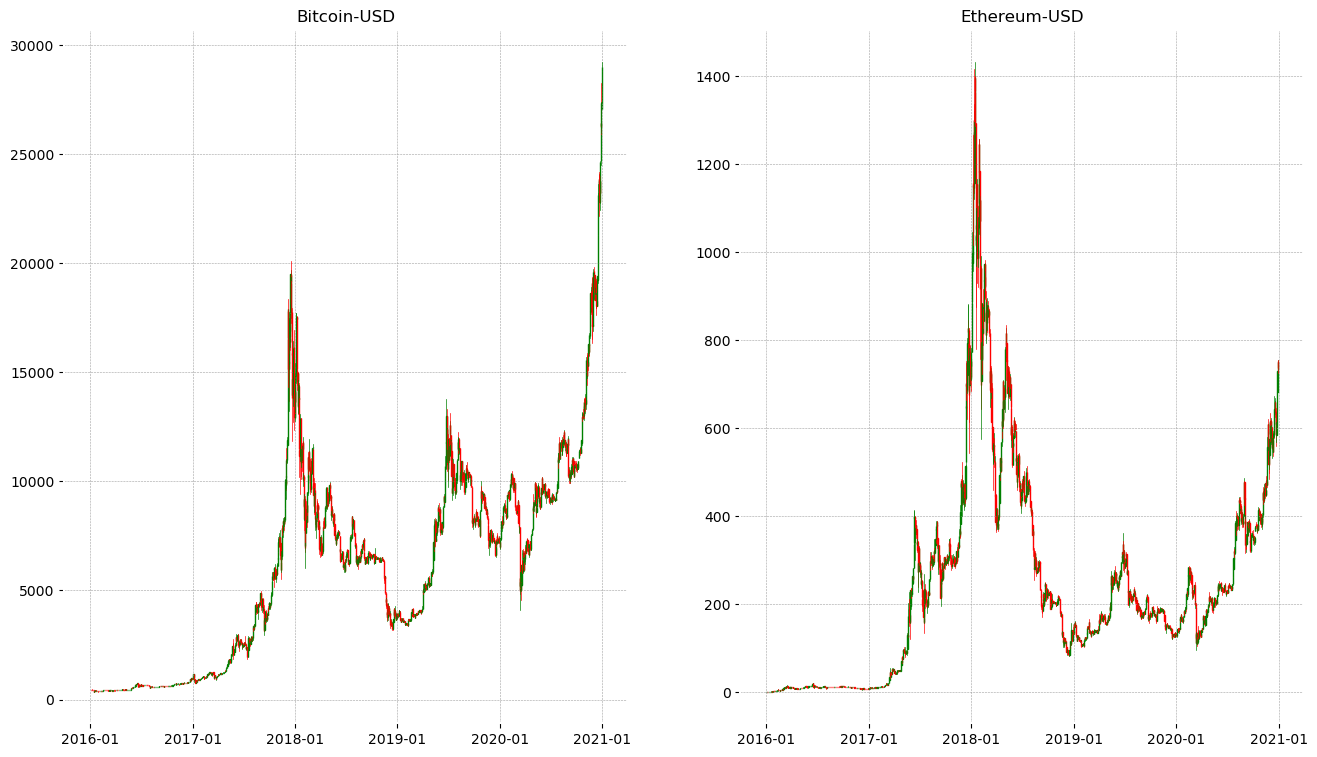

In [178]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,9))
ax1.set_title("Bitcoin-USD")
candlestick_ohlc(ax1, btc_df[["Date", "Open", "High", "Low", "Close"]].values, width=0.6, colorup='g', colordown='r')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax2.set_title("Ethereum-USD")
candlestick_ohlc(ax2, eth_df[["Date", "Open", "High", "Low", "Close"]].values, width=0.6, colorup='g', colordown='r')
ax2.xaxis_date()
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.show()